In [1]:
import pandas as pd
import numpy as np
import keras
import gensim
import pickle
import gc
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
%matplotlib inline

%load_ext autoreload
%autoreload 2
import helper

Using TensorFlow backend.


In [2]:
X_train = np.load("data/word_vectors/pubmed_binary_stratify_no_wiki_X_train_seeds42.npy")
y_train = np.load("data/word_vectors/pubmed_binary_stratify_no_wiki_y_train_seeds42.npy")

In [3]:
X_test = np.load("data/word_vectors/pubmed_binary_stratify_no_wiki_X_test_seeds42.npy")
y_test = np.load("data/word_vectors/pubmed_binary_stratify_no_wiki_y_test_seeds42.npy")

In [4]:
X_train.shape

(1939, 100, 200)

In [5]:
input_shape = (100, 200)

# Basic RNN (GRU)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.recurrent.GRU(256, input_shape=input_shape))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 256)               350976    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 351,233
Trainable params: 351,233
Non-trainable params: 0
_________________________________________________________________
None
Train on 1745 samples, validate on 194 samples
Epoch 1/15
1745/1745 [==============================] - 0s - loss: 1.0202 - acc: 0.6413 - val_loss: 0.6330 - val_acc: 0.5928
Epoch 2/15
1745/1745 [==============================] - 0s - loss: 0.6302 - acc: 0.7095 - val_loss: 0.3927 - val_acc: 0.8041
Epoch 3/15
1745/1745 [==============================] - 0s - loss: 0.3408 - acc: 0.8653 - val_loss

6556

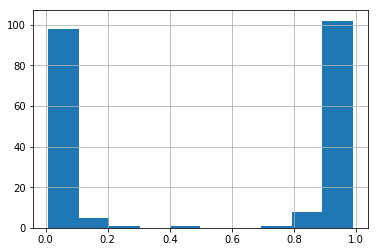

In [15]:
model.compile(optimizer="adagrad",
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=256)
yhat = model.predict(X_test)
_ = helper.score_prediction(y_test, yhat, binary=True)
gc.collect()

# Basic Recurrent CNN

In [34]:
input_shape = (100, 200)
filters = 128
kernel_size = 3
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(filters,
             kernel_size,
             padding='valid',
             activation='relu',
             strides=1, input_shape=input_shape))
model.add(keras.layers.MaxPool1D(pool_size=48))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.recurrent.GRU(64))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 98, 128)           76928     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 2, 128)            0         
_________________________________________________________________
gru_14 (GRU)                 (None, 64)                37056     
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 114,049
Trainable params: 114,049
Non-trainable params: 0
_________________________________________________________________
None

7021

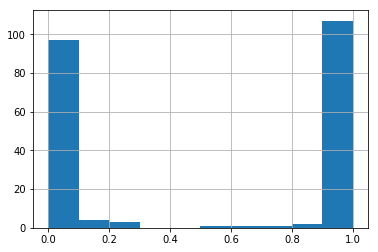

In [35]:
model.compile(optimizer="adagrad",
              loss='binary_crossentropy',
              metrics=['categorical_accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=256)
yhat = model.predict(X_test)
_ = helper.score_prediction(y_test, yhat, binary=True)
gc.collect()